In [1]:
import pandas as pd
import os
PROJ_ROOT = os.path.join(os.pardir)

df_path = os.path.join(PROJ_ROOT, 
                         'data')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
full_data = pd.read_csv(df_path+'\\'+'complete_data_5t.csv') # check path
full_data.drop_duplicates(['full_text','user_id'])
full_data['created_at'] = pd.to_datetime(full_data['created_at'])
full_data.set_index('created_at',inplace=True)
date_ranges=pd.date_range(start=full_data.index.min(), end=full_data.index.max(), freq='D')
date_ranges=date_ranges.strftime('%m-%d-%Y') # reformat


In [3]:

# cols=[x for x in full_data.columns if x.startswith('topic_') and len(x)==7]
cols=['other', 'coronavirus_updates', 'wellness','vaccine_updates','opinion']

full_data = full_data[cols]
# full_data=full_data[[x for x in full_data.columns if x.startswith('topic_') and len(x)==7]].resample('D').sum()
full_data=full_data[cols].resample('D').sum()

full_data.index=full_data.index.strftime('%m-%d-%Y')

In [4]:
full_data = 100 * full_data.div(full_data.sum(axis=1),axis=0)
full_data = np.round(full_data,1)

In [5]:
full_data.head()

,other,coronavirus_updates,wellness,vaccine_updates,opinion
created_at,,,,,
02-22-2021,1.9,0.5,1.3,29.7,66.5
02-23-2021,2.0,1.6,2.1,34.7,59.6
02-24-2021,1.3,2.3,2.3,40.3,53.9
02-25-2021,2.0,3.2,2.7,38.7,53.5
02-26-2021,2.0,1.4,2.0,39.9,54.7


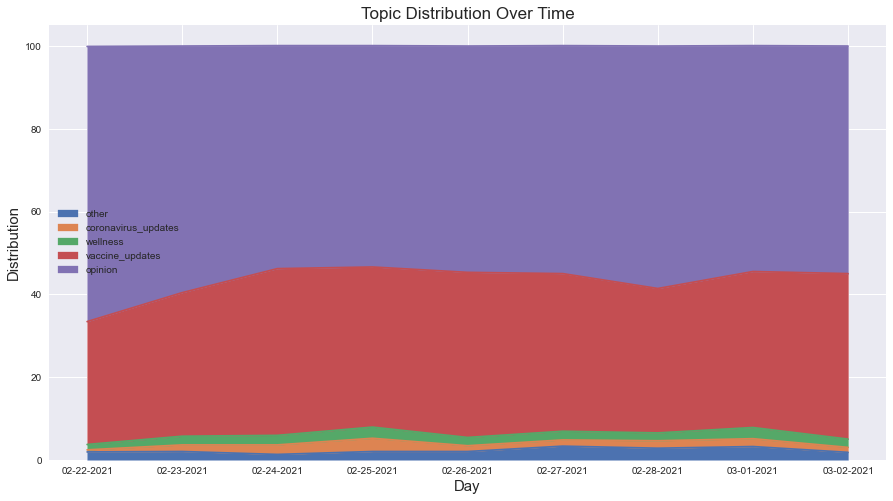

In [6]:
plt.style.use('seaborn')
sns.set_palette('deep')
full_data.plot.area(figsize=(15,8))
plt.xlabel('Day', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.title('Topic Distribution Over Time',fontsize=17)
plt.savefig('5-topic_distribution.png', bbox_inches='tight')
plt.show()

In [7]:
full_data.to_csv(df_path+'\\'+'topic_dist_by_day_5topics.csv')